# KMEANS algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('../data/all_preprocessed.csv')
df.head()

,author,content,poem name,age,type,age_type
0,william shakespeare,let the bird of loudest layon the sole arabian...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
1,duchess of newcastle margaret cavendish,sir charles into my chamber coming in when i w...,An Epilogue to the Above,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
2,thomas bastard,our vice runs beyond all that old men saw and ...,"Book 7, Epigram 42",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
3,edmund spenser,lo i the man whose muse whilome did maske as ...,"from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
4,richard barnfield,long have i longd to see my love againe still ...,Sonnet 16,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore


In [3]:
tfidfVectorizer = TfidfVectorizer(stop_words='english')
vectorizedContent = tfidfVectorizer.fit_transform(df['content'])

In [4]:
finalData = pd.DataFrame(vectorizedContent.toarray(), columns=tfidfVectorizer.get_feature_names_out())
finalData.head()

,10,13,1538,19,1904,1914,1917,1919,1921,1922,...,yvory,ywis,zeal,zealous,zenophontes,zephyrs,zephyrus,zeus,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
colors = ['red', 'green', 'blue', 'purple', 'brown','pink', 'orange', 'darkblue', 'yellow', 'darkgreen']

In [6]:
def drawPlot(nClusters, labels, xs, ys, model):
    if labels == []:
        labels = ['cluster ' + str(i+1) for i in range(nClusters+1)]

    plt.figure(figsize=(8, 8))
    for i in range(nClusters):
        plt.scatter(reduced_data[model.labels_ == i, 0],
                    reduced_data[model.labels_ == i, 1], 
                    s=10, color=colors[i], 
                    label=f' {labels[i]}')
    plt.legend()
    plt.show()

## KMEANS - original

#### Reduce the dimensionality of the data using PCA for plot creation

In [7]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(finalData)
reduced_data

array([[-1.22336436e-01, -1.33291316e-02],
       [-1.57860844e-04,  3.21250954e-03],
       [-1.97473864e-02,  1.05929229e-03],
       ...,
       [-4.74850456e-02,  4.52813398e-05],
       [-4.06053611e-02, -1.75417343e-03],
       [-1.52524805e-01, -2.51292062e-02]])

### K = 2

In [8]:
k = 2

#### Model creation and training

In [9]:
model = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=400, tol=0.00001)

In [10]:
model.fit(finalData)

KMeans(max_iter=400, n_clusters=2, n_init=20, tol=1e-05)

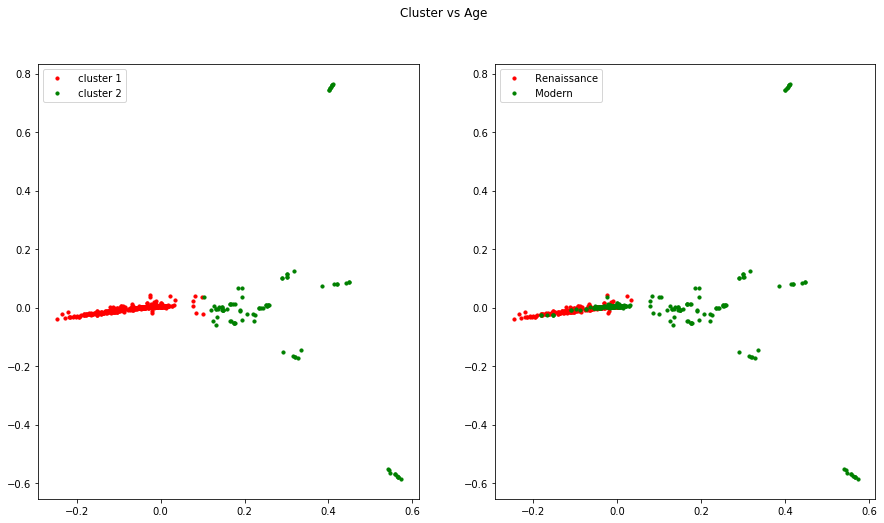

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Cluster vs Age')
cluster = ['cluster ' + str(i+1) for i in range(k+1)]

for i in range(k):
    ax1.scatter(reduced_data[model.labels_ == i, 0],
                reduced_data[model.labels_ == i, 1], 
                s=10, color=colors[i], 
                label=f' {cluster[i]}')
ax1.legend()

ages = df.age.unique()

i = 0
for a in ages:
    ids = df.index[df['age'] == a].tolist()
    ax2.scatter(np.array(reduced_data)[ids, 0],
                np.array(reduced_data)[ids, 1], 
                s=10, color=colors[i], 
                label=f' {ages[i]}')
    i+=1
ax2.legend()

## K = 3

In [12]:
k = 3

In [13]:
model = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=400, tol=0.00001)

In [14]:
model.fit(finalData)

KMeans(max_iter=400, n_clusters=3, n_init=20, tol=1e-05)

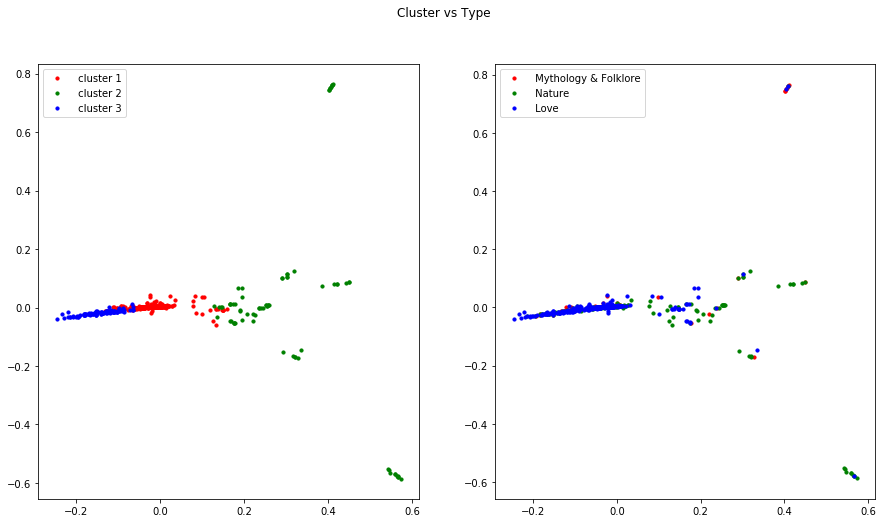

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Cluster vs Type')
cluster = ['cluster ' + str(i+1) for i in range(k+1)]

for i in range(k):
    ax1.scatter(reduced_data[model.labels_ == i, 0],
                reduced_data[model.labels_ == i, 1], 
                s=10, color=colors[i], 
                label=f' {cluster[i]}')
ax1.legend()

types = df.type.unique()

i = 0
for a in types:
    ids = df.index[df['type'] == a].tolist()
    ax2.scatter(np.array(reduced_data)[ids, 0],
                np.array(reduced_data)[ids, 1], 
                s=10, color=colors[i], 
                label=f' {types[i]}')
    i+=1
ax2.legend()

#### Elbow method on nonreduced data

In [16]:
ks = range(2, 10)
inertias = []
silhouettes = []
for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20)
    kmeans.fit(finalData)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(finalData, kmeans.labels_))

<Figure size 720x360 with 0 Axes>

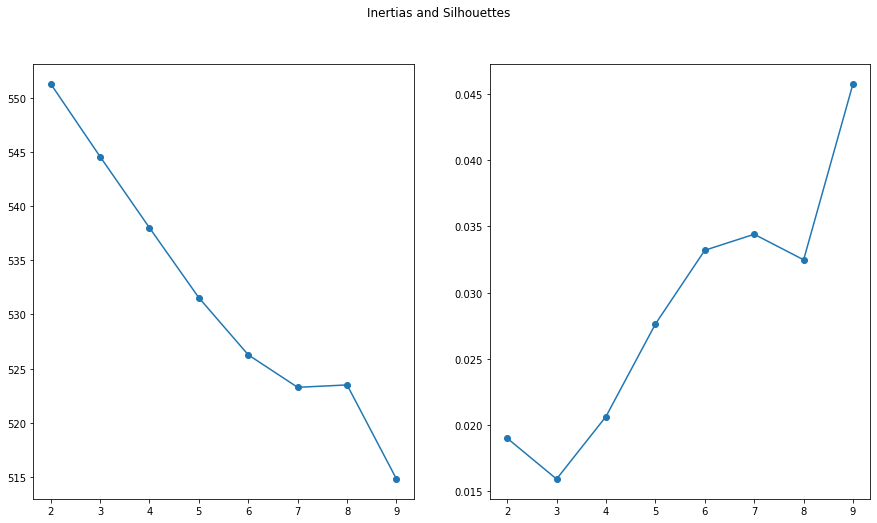

In [17]:
fig = plt.figure(figsize=(10, 5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Inertias and Silhouettes')

ax1.plot(ks, inertias, marker='o')
ax2.plot(ks, silhouettes, marker='o')

## KMEANS with PCA

In [18]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(finalData)
reduced_data

array([[-1.22336218e-01, -1.33751487e-02],
       [-1.62606763e-04,  3.20681203e-03],
       [-1.97449181e-02,  1.03622610e-03],
       ...,
       [-4.74662070e-02,  1.76617913e-06],
       [-4.06012532e-02, -1.73747305e-03],
       [-1.52506079e-01, -2.52878604e-02]])

In [19]:
ks = range(2, 10)
inertias = []
silhouettes = []
for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20)
    kmeans.fit(reduced_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(reduced_data, kmeans.labels_))

<Figure size 720x360 with 0 Axes>

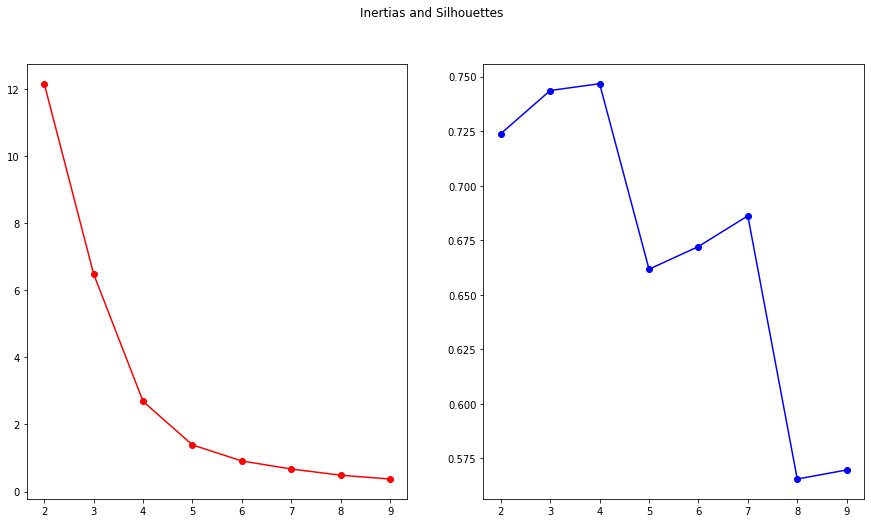

In [20]:
fig = plt.figure(figsize=(10, 5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Inertias and Silhouettes')

ax1.plot(ks, inertias, marker='o', color = 'red')
ax2.plot(ks, silhouettes, marker='o', color = 'blue')

In [21]:
k = 4  

In [22]:
model = KMeans(n_clusters=k, init='k-means++', n_init=30, max_iter=400, tol=0.00001)

In [23]:
model.fit(reduced_data)

KMeans(max_iter=400, n_clusters=4, n_init=30, tol=1e-05)

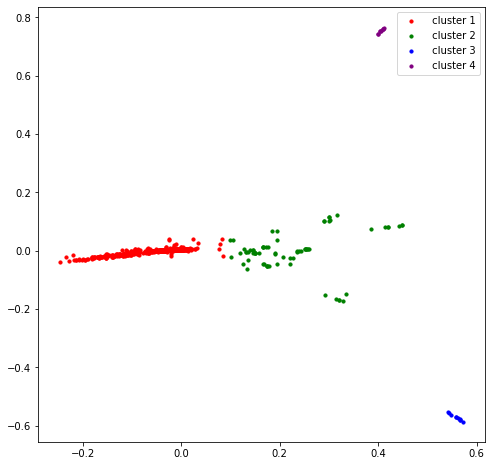

In [24]:
cluster = ['cluster ' + str(i+1) for i in range(k+1)]

plt.figure(figsize=(8, 8))
for i in range(k):
    plt.scatter(reduced_data[model.labels_ == i, 0],
                reduced_data[model.labels_ == i, 1], 
                s=10, color=colors[i], 
                label=f' {cluster[i]}')
plt.legend()
plt.show()